# Visualizing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=6eeea84087c4d638e6b3432b0f0962f7ec99d90dc812484b15cedf64e1b87c4e
  Stored in directory: /root/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


In [ ]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_image = "/content/drive/MyDrive/IIS Lab/train-images.idx3-ubyte"
train_label = "/content/drive/MyDrive/IIS Lab/train-labels.idx1-ubyte"
test_image = "/content/drive/MyDrive/IIS Lab/t10k-images.idx3-ubyte"
test_label = "/content/drive/MyDrive/IIS Lab/t10k-labels.idx1-ubyte"

X_train = idx2numpy.convert_from_file(train_image)
Y_train = idx2numpy.convert_from_file(train_label)
X_test = idx2numpy.convert_from_file(test_image)
Y_test = idx2numpy.convert_from_file(test_label)


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

X_train1 = X_train

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
df_X = pd.DataFrame(X_train)
df_X['label'] = Y_train

df_X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


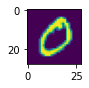

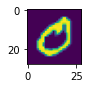

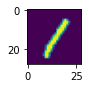

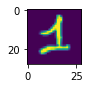

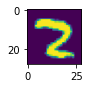

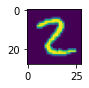

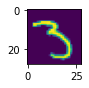

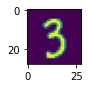

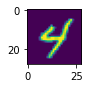

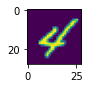

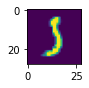

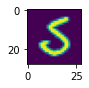

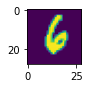

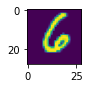

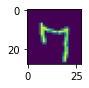

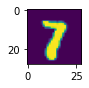

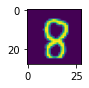

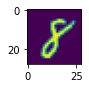

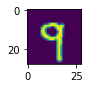

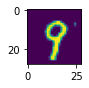

In [ ]:
num = 0
count = 0
for index in df_X:
  if (num<10) and (count<2):
    if df_X.loc[index, 'label'] == num:
      plt.figure(figsize=(1,1))
      plt.imshow(X_train1[index])
      plt.show()
      count = count+1
  else:
    num = num+1
    count = 0

# Binary logistic regression to perform OVO and OVR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

One vs Rest

In [ ]:
model1 = LogisticRegression(solver='lbfgs')
model_ovr = OneVsRestClassifier(model1)
model_ovr.fit(X_train,Y_train)
Y_pred_ovr = model_ovr.predict(X_test)
print(classification_report(Y_test, Y_pred_ovr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.83      0.88      0.86       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Confusion Matrix and Class Wise Accuracy

In [ ]:
print("Confusion Matrix: ")
matrix = confusion_matrix(Y_test, Y_pred_ovr)
print(matrix)
normalized_matrix1 = matrix.astype('float') / matrix.sum(axis=1)

print("\nClass wise accuracy: ")
for i in range(0,10):
  print("Class ",i," : ",f'{normalized_matrix1.diagonal()[i]*100:.2f}%')

Confusion Matrix: 
[[ 957    0    0    4    0    3    6    2    6    2]
 [   0 1116    3    1    0    1    4    1    8    1]
 [   8   12  905   18    9    5   10   11   51    3]
 [   3    0   19  915    2   22    5   11   25    8]
 [   1    2    4    3  910    0   12    2   10   38]
 [  11    2    1   34   10  763   16    7   40    8]
 [   7    3    7    2    4   17  909    1    8    0]
 [   3    6   24    4    7    1    1  945    5   32]
 [   9   14    7   22   11   27    7   12  854   11]
 [   9    6    2   13   30    4    0   24   16  905]]

Class wise accuracy: 
Class  0  :  97.65%
Class  1  :  98.33%
Class  2  :  87.69%
Class  3  :  90.59%
Class  4  :  92.67%
Class  5  :  85.54%
Class  6  :  94.89%
Class  7  :  91.93%
Class  8  :  87.68%
Class  9  :  89.69%


One vs One

In [ ]:
model2 = LogisticRegression(solver='lbfgs')
model_ovo = OneVsOneClassifier(model2)
model_ovo.fit(X_train,Y_train)
Y_pred_ovo = model_ovo.predict(X_test)
print(classification_report(Y_test, Y_pred_ovo))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.93      0.96      0.94       982
           5       0.89      0.87      0.88       892
           6       0.95      0.94      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Confusion Matrix and Class Wise Accuracy

In [ ]:
print("Confusion Matrix: ")
matrix2 = confusion_matrix(Y_test, Y_pred_ovo)
print(matrix2)
normalized_matrix2 = matrix2.astype('float') / matrix2.sum(axis=1)

print("\nClass wise accuracy: ")
for i in range(0,10):
  print("Class ",i," : ",f'{normalized_matrix2.diagonal()[i]*100:.2f}%')

Confusion Matrix: 
[[ 952    0    7    1    1    7    6    2    3    1]
 [   0 1108    5    3    0    1    2    1   15    0]
 [   3    9  942   13    7    5    9   12   28    4]
 [   2    2    9  930    1   25    2    7   30    2]
 [   2    0    9    0  939    1    5    3    4   19]
 [  10    5    6   36    5  772   12    3   34    9]
 [   6    1   16    2    5   22  901    0    5    0]
 [   2    3   21   12   13    0    0  952    5   20]
 [   7    4    6   22    7   27    7    7  875   12]
 [   6    7    2   11   34    6    1   23   14  905]]

Class wise accuracy: 
Class  0  :  97.14%
Class  1  :  97.62%
Class  2  :  91.28%
Class  3  :  92.08%
Class  4  :  95.62%
Class  5  :  86.55%
Class  6  :  94.05%
Class  7  :  92.61%
Class  8  :  89.84%
Class  9  :  89.69%
